# Hola &#x1F600;

Soy **Hesus Garcia**, revisor de código de Triple Ten, y voy a examinar el proyecto que has desarrollado recientemente. Si encuentro algún error, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 
**Una gran disculpa por el retraso en la revisión de tu proyecto. Hemos tenido una carga de proyectos que nos sobrepasó**
Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;


# INTRODUCCION

El siguiente proyecto consiste en asesorar a la compañía de telecomunicaciones Interconnect sobre la creación de un modelo predictivo de la tasa de cancelación de clientes, de tal forma de que la compañía pueda anticiparse para ofrecer códigos promocionlaes y opciones de planes especiales. 

Para ello se utilizaran bases de datos facilitadas por el equipo de marketing de Interconnect que recopila datos desde el 2016 en adelante.
Se debe considerar que la información del contrato es válida a partir del 1 de febrero de 2020.

## Inicialización

In [1]:
import pandas as pd
import re
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score, auc

## Carga de datos

In [2]:
contract = pd.read_csv('final_provider/contract.csv')
personal = pd.read_csv('final_provider/personal.csv')
internet = pd.read_csv('final_provider/internet.csv')
phone = pd.read_csv('final_provider/phone.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'final_provider/contract.csv'

<div class="alert alert-block alert-danger">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Me parece que estos no son los datasets para el proyecto final, por favor revisa mi comentario del final.  </div>


<div class="alert alert-block alert-info">
<b>Respuesta estudiante</b> <a class=“tocSkip”></a>

    Corregido el llaado a los datasets
</div>


## Análisis exploratorio de datos (EDA)

In [ ]:
contract.info() #Verificamos los campos a nivel general de 'contract'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Glosario de dataset 'contract':

* customerID - ID del cliente (clave para unir datasets).
* BeginDate - Fecha de inicio del contrato (puede ayudar a calcular la duración del contrato).
* EndDate - Fecha de fin del contrato (puede ayudar a determinar si un contrato ha finalizado recientemente).
* Type - Tipo de contrato (mensual, 1 año, 2 años), importante para entender la fidelidad del cliente.
* PaperlessBilling - Facturación electrónica (puede influir en la satisfacción del cliente).
* PaymentMethod - Método de pago (algunos métodos pueden estar asociados con una mayor probabilidad de churn).
* MonthlyCharges - Cobro mensual (importante para entender la carga financiera sobre el cliente).
* TotalCharges - Cobro total (puede reflejar el valor del cliente a lo largo del tiempo).

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
La carga de datos se realiza correctamente, utilizando pandas para leer los archivos CSV. Además, se incluye una descripción de los campos en el dataset 'contract', lo que facilita la comprensión de las variables disponibles para el análisis.
</div>

In [ ]:
contract.tail(4) #Vemos una muestra

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6
7042,3186-AJIEK,2014-08-01,No,Two year,Yes,Bank transfer (automatic),105.65,6844.5


In [ ]:
#Verificamos duplicidad
duplicados1 = contract.duplicated()
cantidad_duplicados1 = duplicados1.sum()
cantidad_duplicados1 # Finalmente, comprobamos el número de filas duplicadas de 'contract'

0

A continuacion procedemos a revisar los posibles errores y/o anomalías de cada variable de 'contract'.

In [ ]:
contract['BeginDate'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en las fechas.

array(['2013-10-01', '2013-11-01', '2013-12-01', '2014-01-01',
       '2014-02-01', '2014-03-01', '2014-04-01', '2014-05-01',
       '2014-06-01', '2014-07-01', '2014-08-01', '2014-09-01',
       '2014-10-01', '2014-11-01', '2014-12-01', '2015-01-01',
       '2015-02-01', '2015-03-01', '2015-04-01', '2015-05-01',
       '2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
       '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
       '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
       '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
       '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
       '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
       '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
       '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
       '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
       '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
       '2018-10-01', '2018-11-01', '2018-12-01', '2019-

In [ ]:
contract['EndDate'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en las fechas.

array(['2019-10-01 00:00:00', '2019-11-01 00:00:00',
       '2019-12-01 00:00:00', '2020-01-01 00:00:00', 'No'], dtype=object)

In [ ]:
# Creamos la variable objetivo en una nueva columna, ya que es clave para el análisis.
contract['ContractStatus'] = contract['EndDate'].apply(lambda x: 1 if x == 'No' else 0)

# Verificamos el resultado
print(contract[['EndDate', 'ContractStatus']].head())

               EndDate  ContractStatus
0                   No               1
1                   No               1
2  2019-12-01 00:00:00               0
3                   No               1
4  2019-11-01 00:00:00               0


In [ ]:
contract['Type'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
contract['PaperlessBilling'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array(['No', 'Yes'], dtype=object)

In [ ]:
contract['PaymentMethod'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array(['Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [ ]:
personal.info() #Verificamos los campos a nivel general de 'personal'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Glosario para dataset 'personal':

* customerID - ID del cliente.
* gender - Género (podría tener alguna correlación con la tasa de cancelación, aunque debe analizarse cuidadosamente para evitar sesgos).
* SeniorCitizen - Indicador de si el cliente es ciudadano senior (los clientes mayores pueden tener diferentes patrones de comportamiento).
* Partner - Si el cliente tiene pareja (puede influir en la estabilidad del cliente con el servicio).
* Dependents - Si el cliente tiene dependientes (podría influir en la decisión de cancelar el servicio).

In [ ]:
personal.head(4)  # Vemos una muestra

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No


In [ ]:
#Verificamos duplicidad
duplicados2 = personal.duplicated()
cantidad_duplicados2 = duplicados2.sum()
cantidad_duplicados2 # Finalmente, comprobamos el número de filas duplicadas de 'personal'

0

A continuacion procedemos a revisar los posibles errores y/o anomalías de cada variable de 'personal'.

In [ ]:
personal['gender'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array(['Female', 'Male'], dtype=object)

In [ ]:
personal['SeniorCitizen'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array([0, 1])

In [ ]:
personal['Partner'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array(['No', 'Yes'], dtype=object)

In [ ]:
personal['Dependents'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array(['No', 'Yes'], dtype=object)

In [ ]:
internet.info() #Verificamos los campos a nivel general de 'internet'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Glosario del dataset 'internet':
     
* customerID: ID del cliente.
* InternetService: Servicios de internet a través de línea telefónica (DSL, línea de abonado digital) o a través de un cable de fibra óptica.
* OnlineSecurity: Si tiene o no servicio de bloqueador de sitios web maliciosos
* OnlineBackup: Si tiene o no el servicio de almacenamiento y back up de datos.
* DeviceProtection: Si tiene el servicio o no de antivirus.
* TechSupport: Si tiene servicio de soporte técnico.
* StreamingTV: Si tiene o no servicio de TV.
* StreamingMovies: Si tiene o no servicio de directorio de peliculas.


In [ ]:
internet.tail(4) #Vemos una muestra

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No
5516,3186-AJIEK,Fiber optic,Yes,No,Yes,Yes,Yes,Yes


In [ ]:
#Verificamos duplicidad
duplicados3 = internet.duplicated()
cantidad_duplicados3 = duplicados3.sum()
cantidad_duplicados3 # Finalmente, comprobamos el número de filas duplicadas de 'internet'

0

In [ ]:
internet.describe() # Vemos si hay anomalías en los valores numéricos de 'internet'

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7760-OYPDY,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


A continuacion procedemos a revisar los posibles errores y/o anomalías de cada variable de 'internet'.

In [ ]:
internet['InternetService'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en servicio de internet.

array(['DSL', 'Fiber optic'], dtype=object)

In [ ]:
internet['OnlineSecurity'].sort_values(ascending=True).unique() # Verificamos posibles anomalías.

array(['No', 'Yes'], dtype=object)

In [ ]:
internet['OnlineBackup'].sort_values(ascending=True).unique() # Verificamos posibles anomalías.

array(['No', 'Yes'], dtype=object)

In [ ]:
internet['DeviceProtection'].sort_values(ascending=True).unique() # Verificamos posibles anomalías.

array(['No', 'Yes'], dtype=object)

In [ ]:
internet['TechSupport'].sort_values(ascending=True).unique() # Verificamos posibles anomalías.

array(['No', 'Yes'], dtype=object)

In [ ]:
internet['StreamingTV'].sort_values(ascending=True).unique() # Verificamos posibles anomalías.

array(['No', 'Yes'], dtype=object)

In [ ]:
internet['StreamingMovies'].sort_values(ascending=True).unique() # Verificamos posibles anomalías.

array(['No', 'Yes'], dtype=object)

In [ ]:
phone.info() #Verificamos los campos a nivel general de 'phone'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Glosario dataset 'phone': 

* customerID - ID del cliente.
* MultipleLines - Indicador de si el cliente tiene múltiples líneas telefónicas (puede ser relevante para entender la complejidad del servicio contratado).

In [ ]:
phone.head()  #Vemos una muestra

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [ ]:
#Verificamos duplicidad
duplicados4 = phone.duplicated()
cantidad_duplicados4 = duplicados4.sum()
cantidad_duplicados4 # Finalmente, comprobamos el número de filas duplicadas de 'phone'

0

A continuacion procedemos a revisar los posibles errores y/o anomalías de cada variable de 'phone'.

In [ ]:
phone['MultipleLines'].sort_values(ascending=True).unique() # Verificamos posibles anomalías en los datos.

array(['No', 'Yes'], dtype=object)

Para efectos de analizar las variables en su totalidad en funcion de la variable objetivo es necesario unificar los datasets a continuacion:

In [ ]:
# Unir los datasets contract y personal
data = contract.merge(personal, on='customerID', how='left')

# Unir el dataset phone
data = data.merge(phone[['customerID', 'MultipleLines']], on='customerID', how='left')
# Unir el dataset internet
data = data.merge(internet, on='customerID', how='left')

data.info()#Verificamos la unificacion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   ContractStatus    7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     6361 non-null   object 
 14  InternetService   5517 non-null   object 
 15  OnlineSecurity    5517 non-null   object 
 16  OnlineBackup      5517 non-null   object 


<div class="alert alert-block alert-success">
    <b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Correcto, info(), head()  son herramientas esceneciales que nos ayudaran a hacer un análisis exploratorio inicial. Opcionalmente podrías siempre incluir describe() para tener mejor idea de los valores que toman tus varibales. Continúa con el buen trabajo! </div>

**Análisis de los datasets**

1) Los datasets por separado no tiene valores ausentes, pero al unirlos en un solo dataset se generan valores ausentes que se deben tratar.
2) No hay duplicidad de datos en los datasets.
3) Los datasets no tienen valores anómalos.
4) Los tipos de datos son correctos para cada variable en todos los datasets, excepto aquellos que tienen variables de fecha. Debiese cambiar de 'object' a 'datetime'.
5) Los nombres de las columnas es recomendable que estén en minuscula.
6) Se recomienda crear una nueva columna para calcular el tiempo de vigencia del contrato.


### Preprocesamiento de datos

Procederemos a corregir los datos según lo analizado anteriormente.

In [ ]:
# Definimos funcion para corregir texto de variables
def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

In [ ]:
# Renombrar las columnas del DataFrame usando la función to_snake_case
data.rename(columns=lambda x: to_snake_case(x), inplace=True)
# Verificamos cambios
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
 8   contract_status    7043 non-null   int64  
 9   gender             7043 non-null   object 
 10  senior_citizen     7043 non-null   int64  
 11  partner            7043 non-null   object 
 12  dependents         7043 non-null   object 
 13  multiple_lines     6361 non-null   object 
 14  internet_service   5517 non-null   object 
 15  online_security    5517 non-null   object 
 16  online_backup      5517 

Revisando los valores ausentes podemos observar que, por ejemplo, para un 'customer_id' en donde no se tenga información de por ejemplo 'online_security' quiere decir que ese cliente no tiene esa información porque no tiene ese servicio (recordar que se hizo un cruce de datasets).

Por lo tanto rellenaremos esos valores ausentes con la palabra 'No'.

In [ ]:
for item in ['multiple_lines','internet_service','online_security','online_backup',
             'device_protection','tech_support','streaming_tv','streaming_movies']:
    data[item] = data[item].fillna('No')

In [ ]:
# Procedemos a corregir los tipos de datos de fechas.
data['begin_date'] = pd.to_datetime(data['begin_date'],format='%Y-%m-%d')
data['end_date'] = pd.to_datetime(data['end_date'],format='%Y-%m-%d %H:%M:%S', errors='coerce')

Por efectos de **multicolinealidad**, eliminamos el valor 'total_charges' ya que 'monthly_charges' refleja mejor la carga financiera recurrente del cliente y puede ser más dinámico para detectar cambios en el comportamiento del cliente. Además, se decidió no incorporar una columna de duración de contratos por el mismo efecto de multicolinealidad con la variable objetivo 'contract_status'.

In [ ]:
# Eliminar columna 'total_charges' para que no afecte el modelo.
data = data.drop(columns=['total_charges'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   contract_status    7043 non-null   int64         
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  multiple_lines     7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

### Distribución de datos - Gráficos

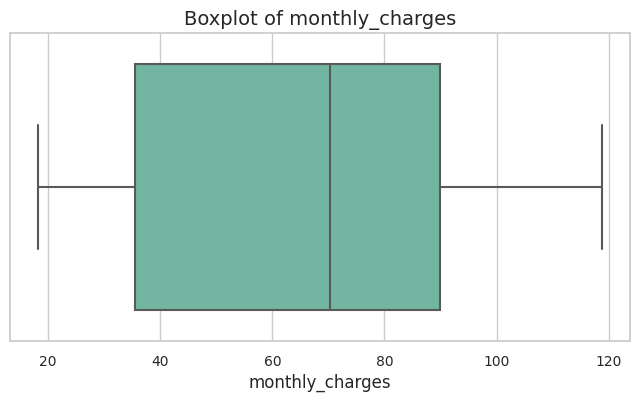

In [ ]:
# Estilos de Seaborn
sns.set(style="whitegrid")

# Boxplots para detectar outliers en variables numéricas
for column in data.select_dtypes(include=['float64']).columns:
    plt.figure(figsize=(8, 4))  # Tamaño de la figura más pequeño
    sns.boxplot(x=data[column], palette="Set2")
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

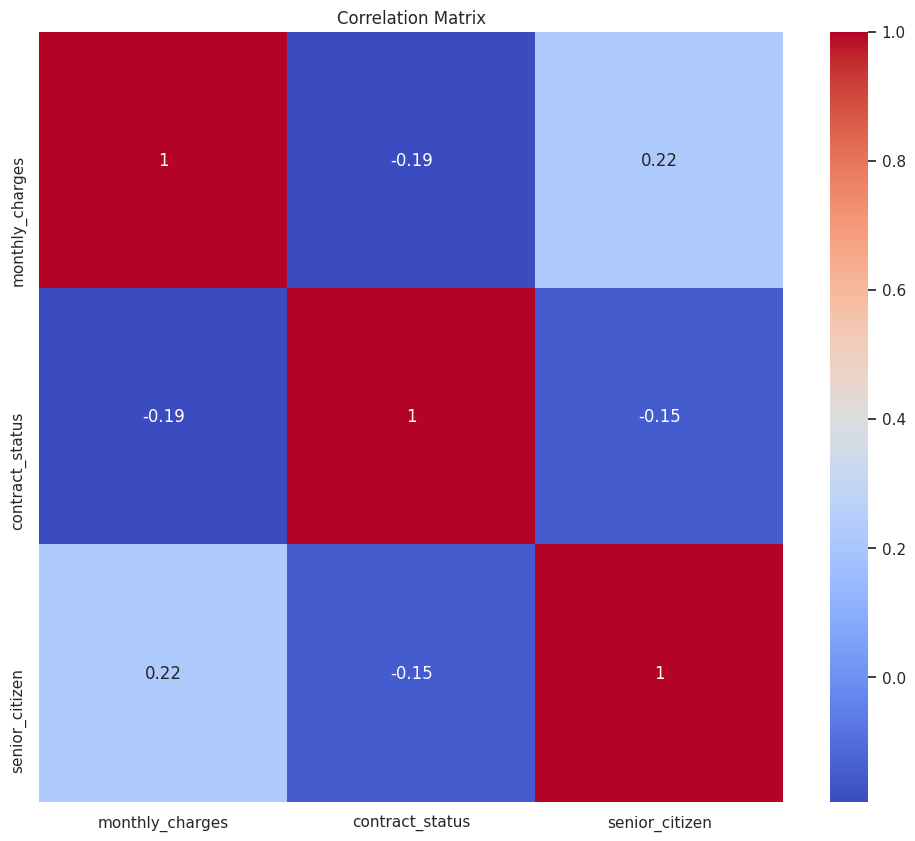

In [ ]:
# Filtramos solo las columnas numéricas
numeric_data = data.select_dtypes(include=['number'])


# Matriz de correlación (Variables numéricas vs variable objetivo)
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Definimos la función para visualizar histogramas de variables categóricas
def visualize_histograms(df, columns, title):
    categorical_columns = [col for col in columns if df[col].dtype == 'object']
    n = len(categorical_columns)
    rows = (n + 1) // 2
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 5 * rows))
    axes = axes.flatten()
    for i, column in enumerate(categorical_columns):
        axes[i].hist(df[column].dropna(), bins=30, alpha=0.7, edgecolor='black')  # Añadir borde negro a las barras
        axes[i].set_title(f'Histograma de {column}')
        
        # Ajustamos los ticks del eje x para mejor visibilidad
        axes[i].tick_params(axis='x', labelsize=10)  # Ajusta el tamaño de las etiquetas del eje x
        axes[i].tick_params(axis='y', labelsize=10)  # Ajusta el tamaño de las etiquetas del eje y
    
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(90)
        
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Definimos la función para visualizar gráficos de línea de variables numéricas
def visualize_line_plots(df, columns, title):
    numeric_columns = [col for col in columns if df[col].dtype == 'float64']
    n = len(numeric_columns)
    rows = (n + 1) // 2
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 5 * rows))
    axes = axes.flatten()
    for i, column in enumerate(numeric_columns):
        sorted_data = df[column].dropna().sort_values().reset_index(drop=True)
        axes[i].plot(sorted_data, alpha=0.7)
        axes[i].set_title(f'Gráfico de Línea de {column}')
        axes[i].set_xlim(left=0, right=len(sorted_data))
        axes[i].tick_params(axis='x', labelsize=10)
        axes[i].tick_params(axis='y', labelsize=10)
        for tick in axes[i].get_xticklabels():
            tick.set_rotation(90)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
    
# Definimos la función para visualizar gráficos de torta de variables de tipo int
def visualize_pie_charts(df, columns, title):
    int_columns = [col for col in columns if df[col].dtype == 'int64']
    n = len(int_columns)
    rows = (n + 1) // 2
    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(12, 5 * rows))
    axes = axes.flatten()
    for i, column in enumerate(int_columns):
        data = df[column].value_counts()
        axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
        axes[i].set_title(f'Gráfico de Torta de {column}')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()    

# Función para crear tablas de contingencia y gráficos de calor
def visualize_contingency_heatmap(df, categorical_columns, target_column, title):
    for column in categorical_columns:
        contingency_table = pd.crosstab(df[column], df[target_column])
        plt.figure(figsize=(10, 6))
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
        plt.title(f'Tabla de Contingencia y Gráfico de Calor de {column} vs {target_column}')
        plt.show() 

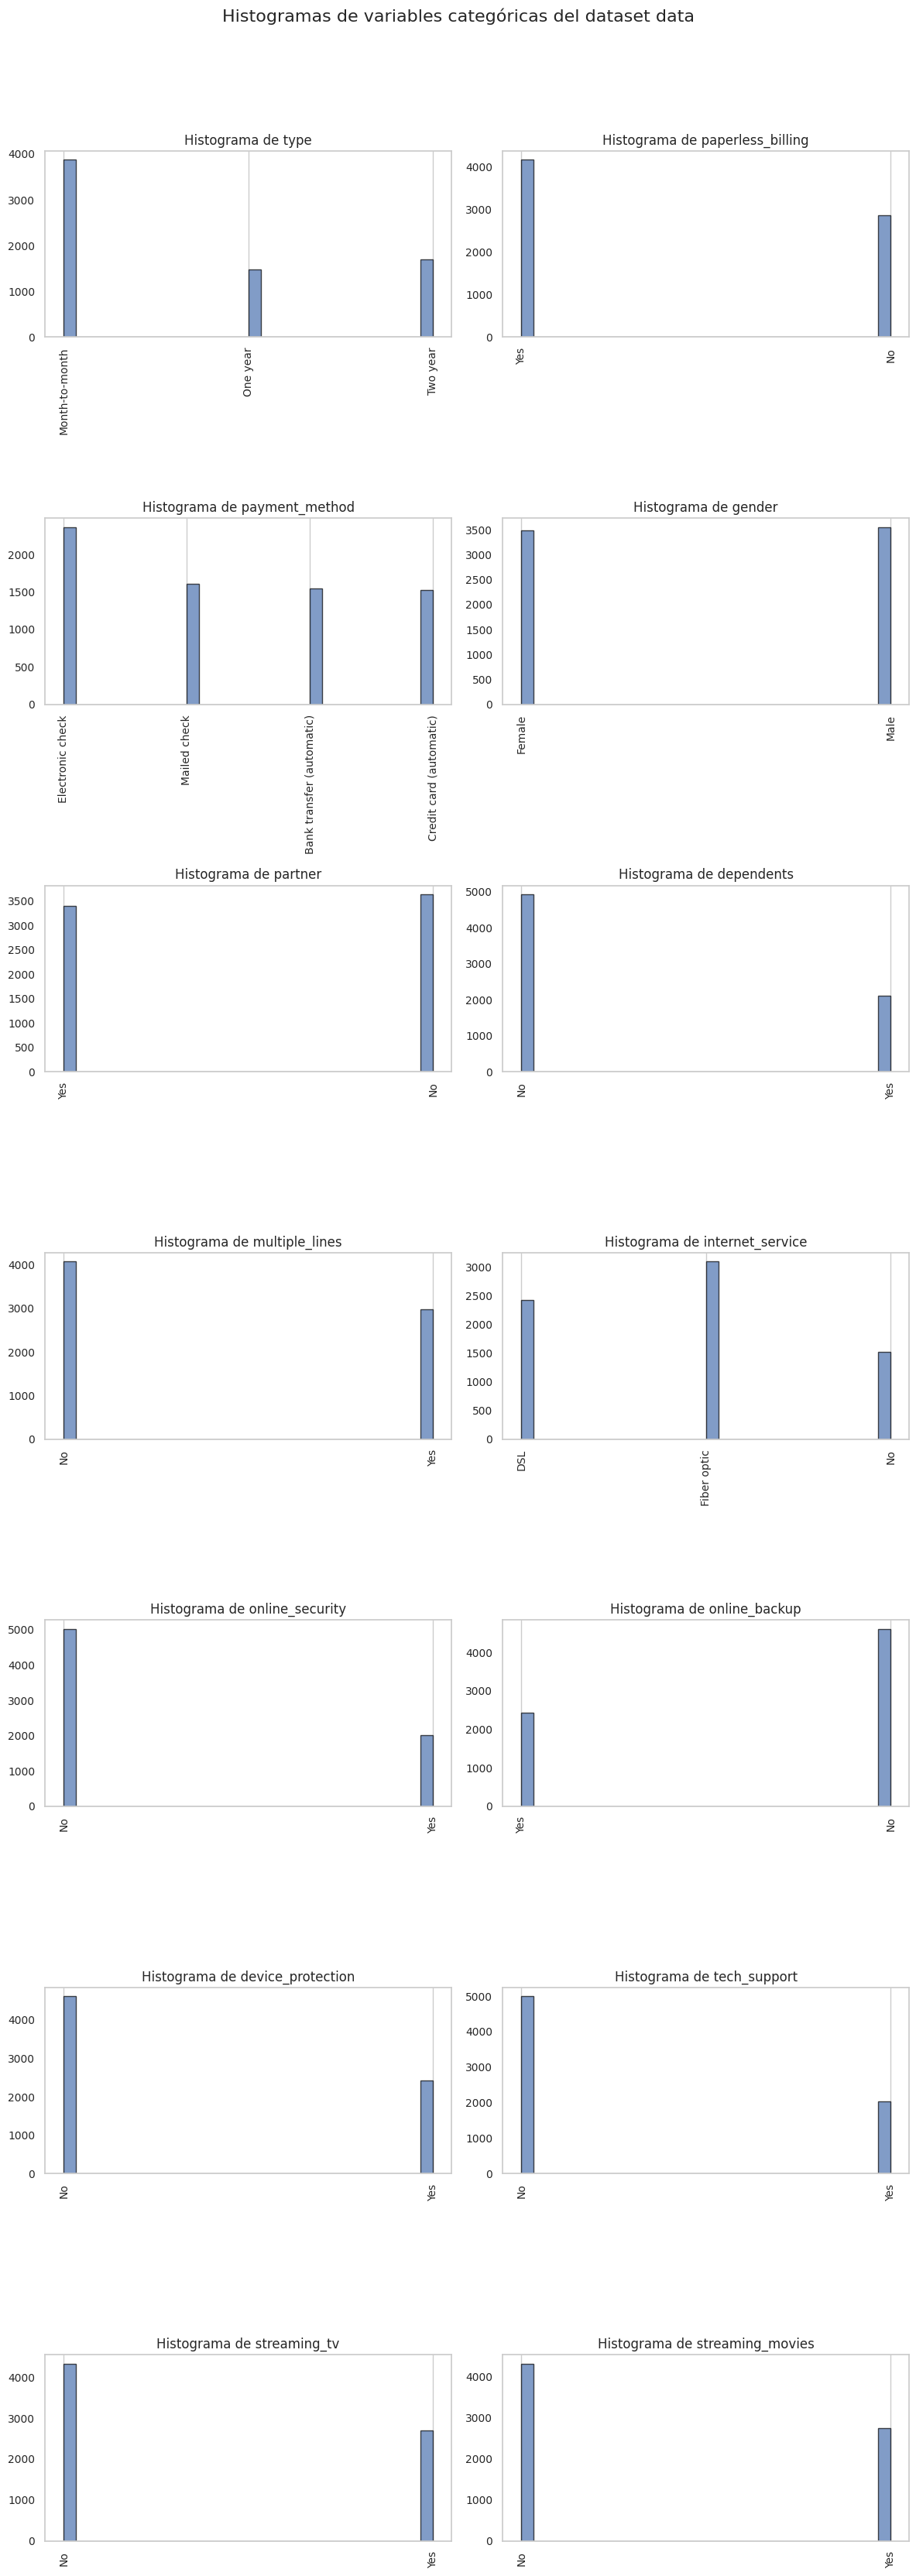

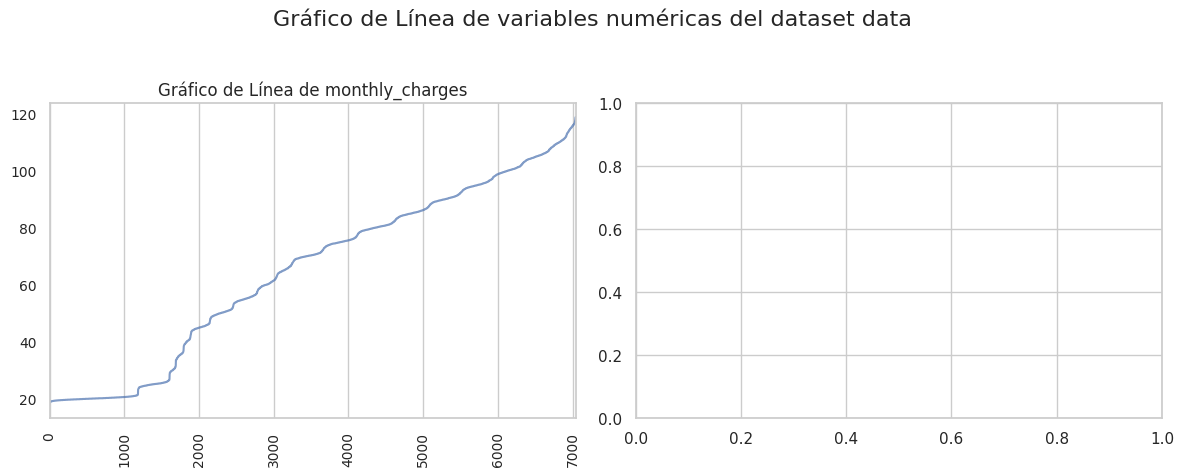

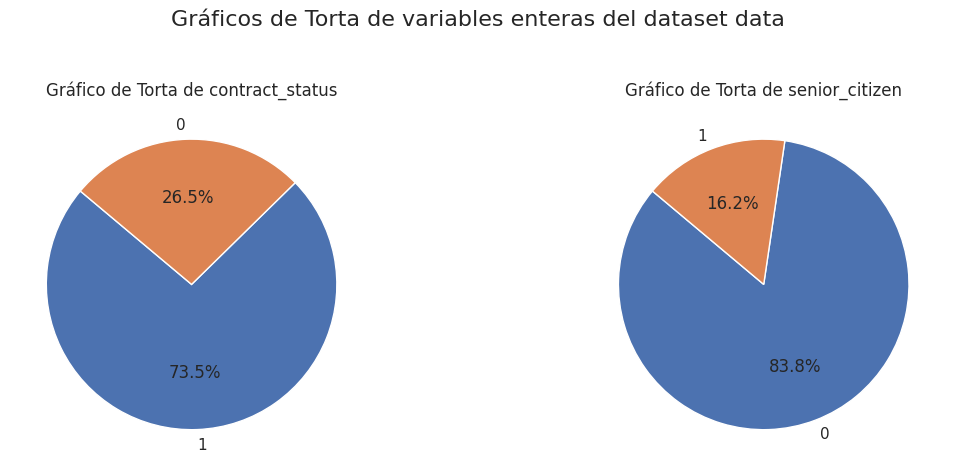

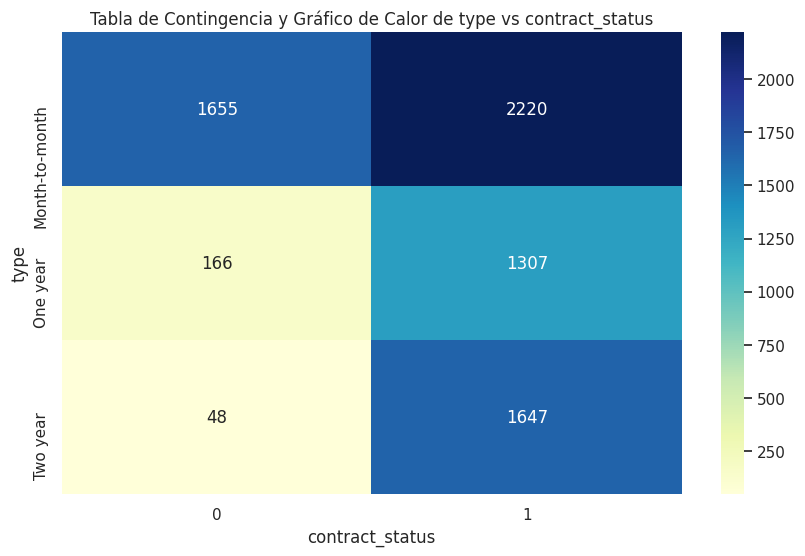

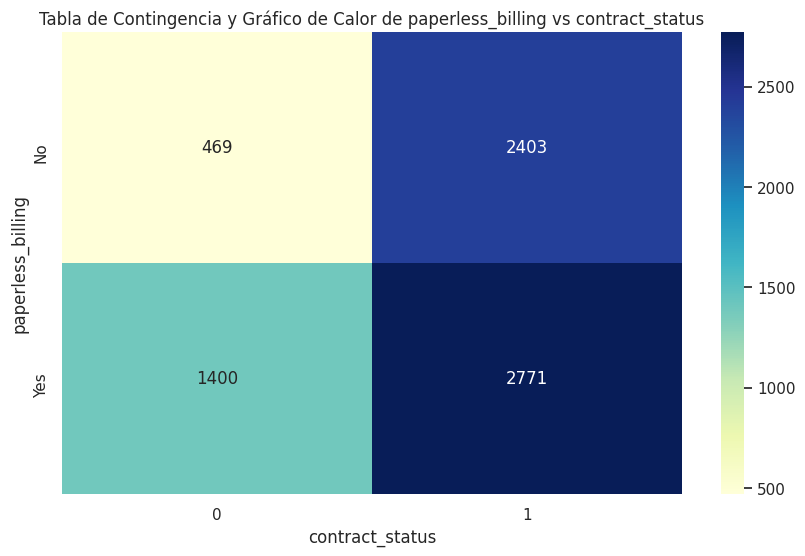

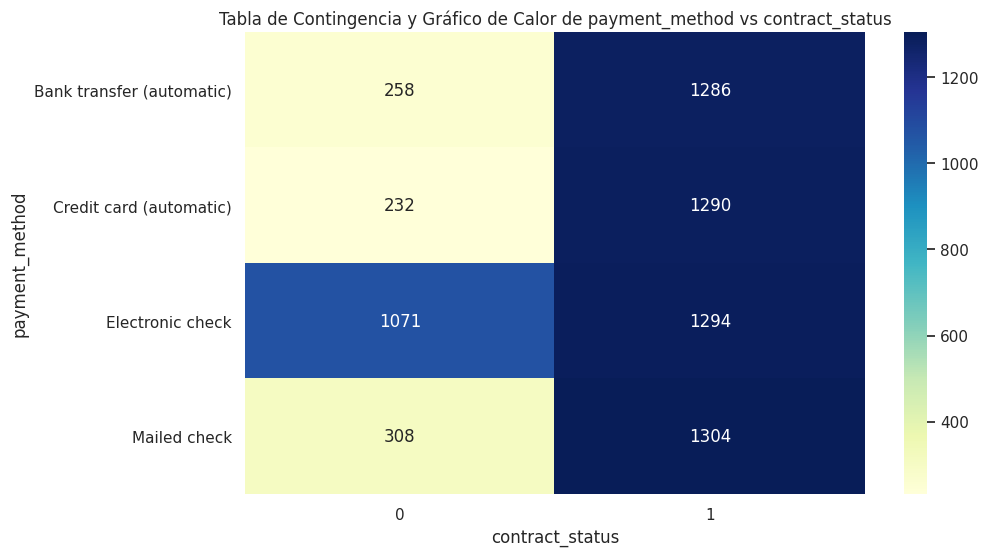

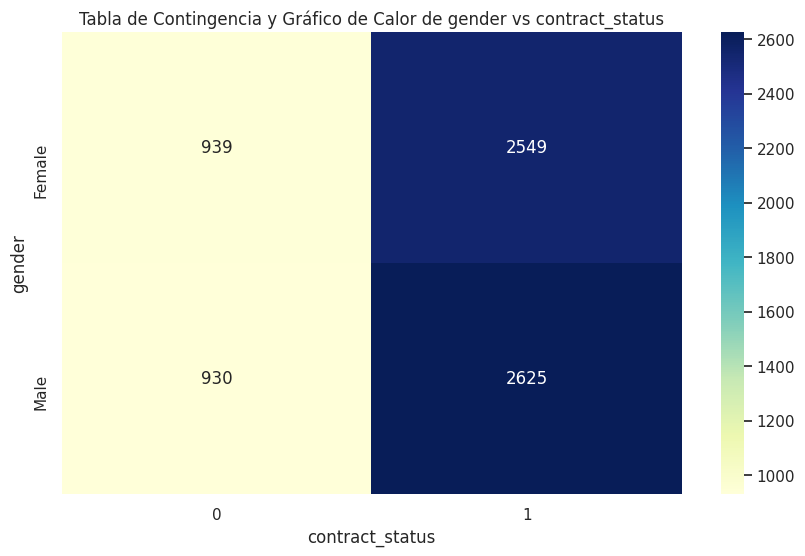

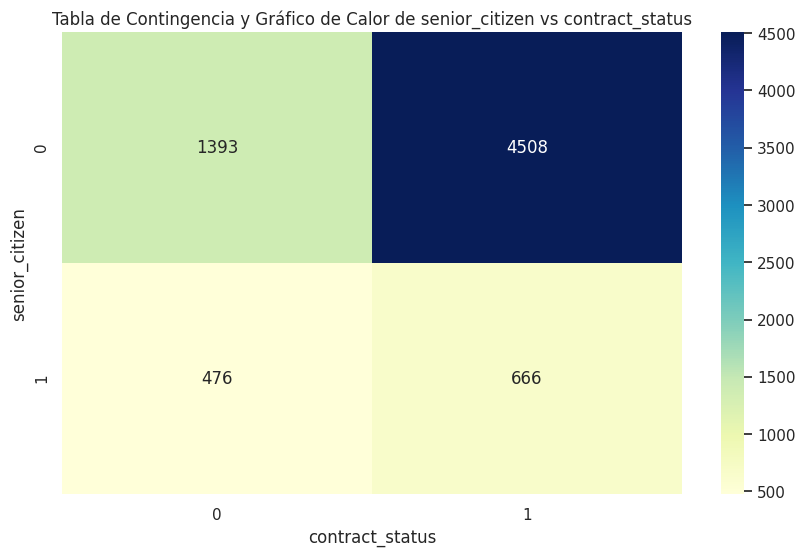

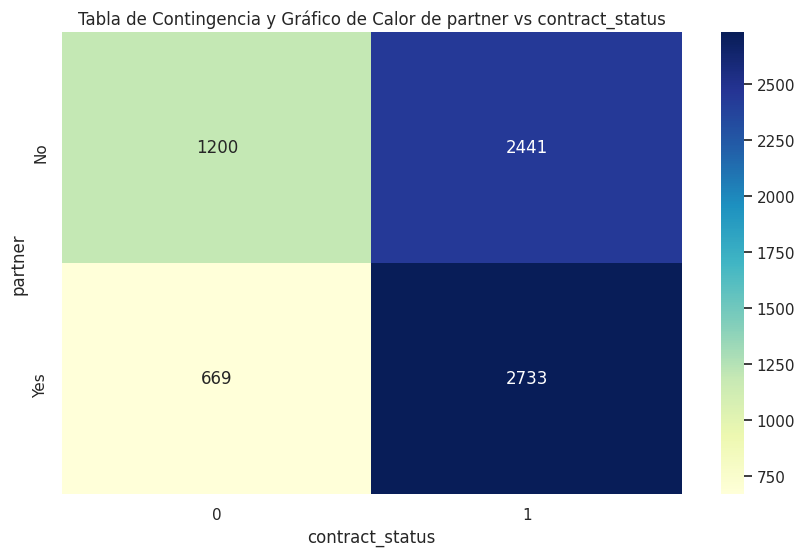

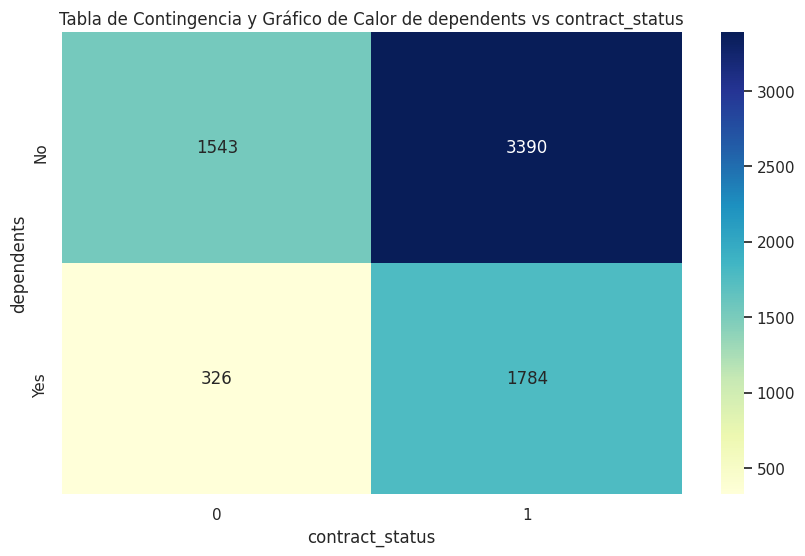

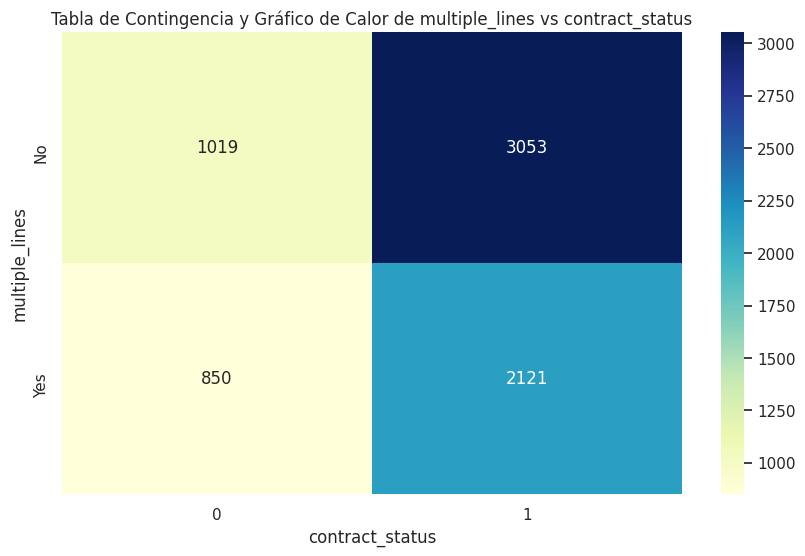

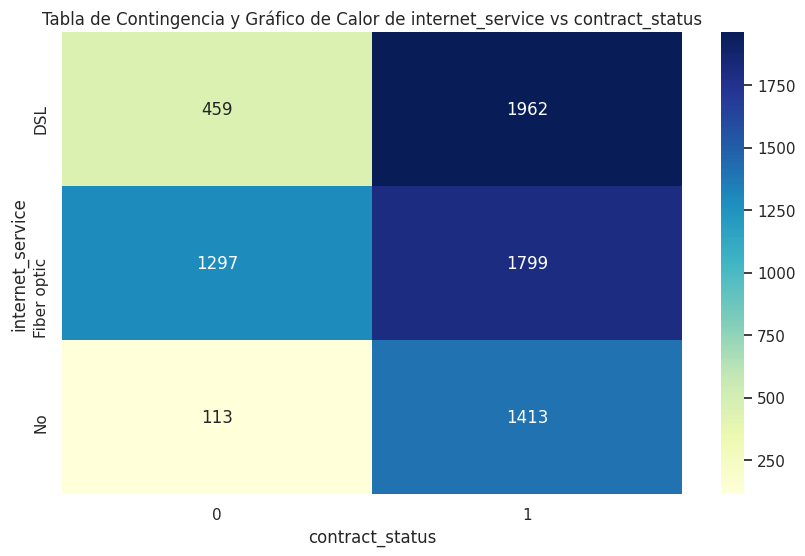

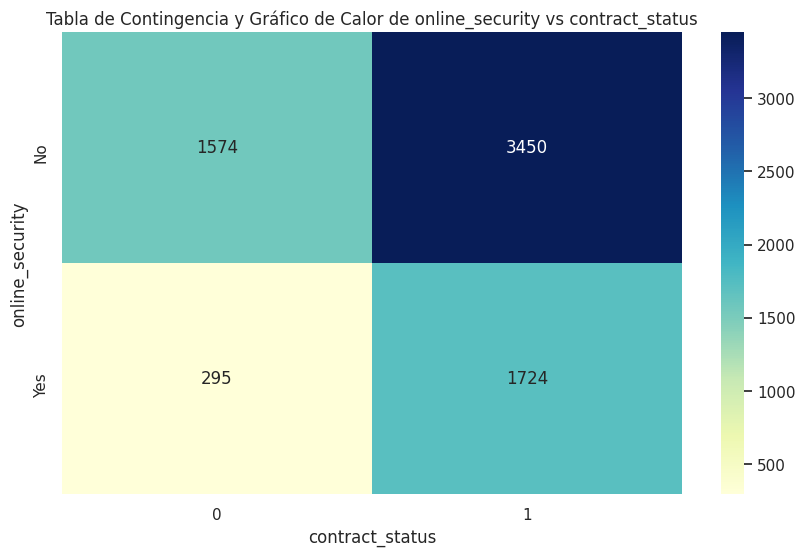

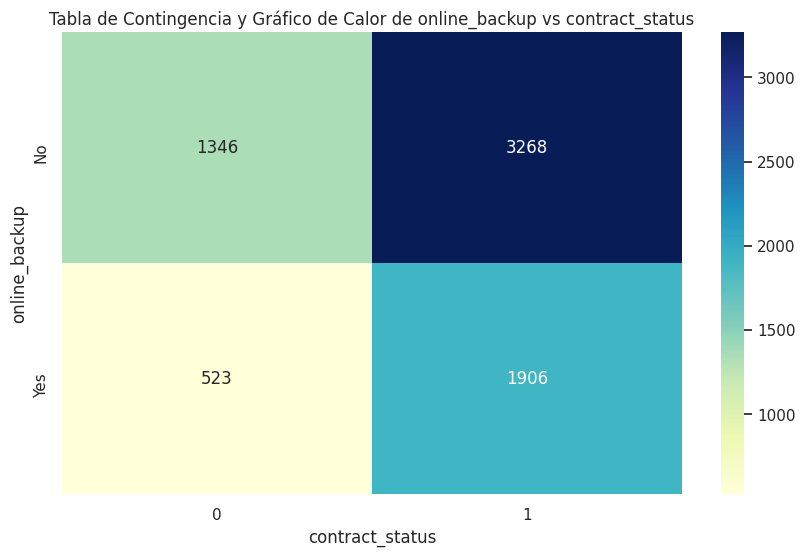

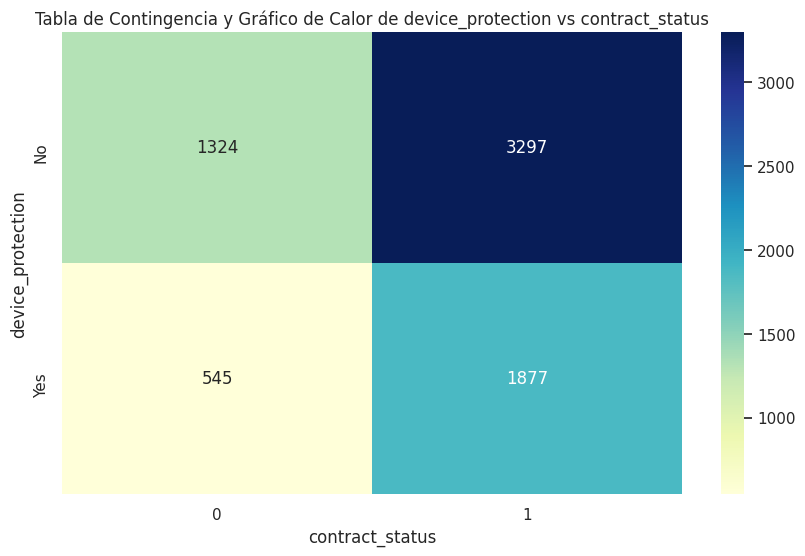

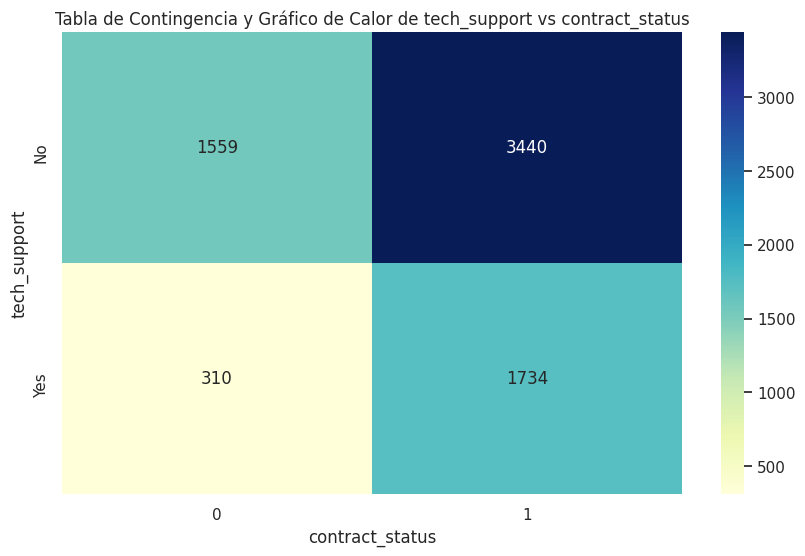

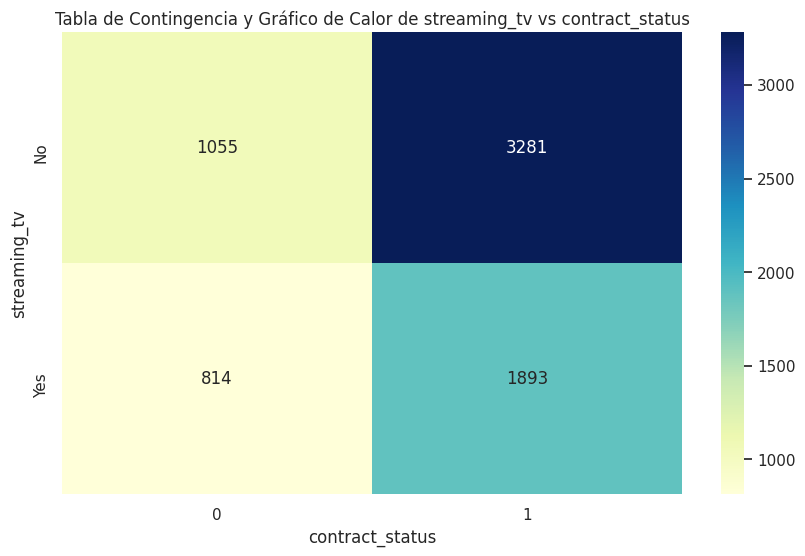

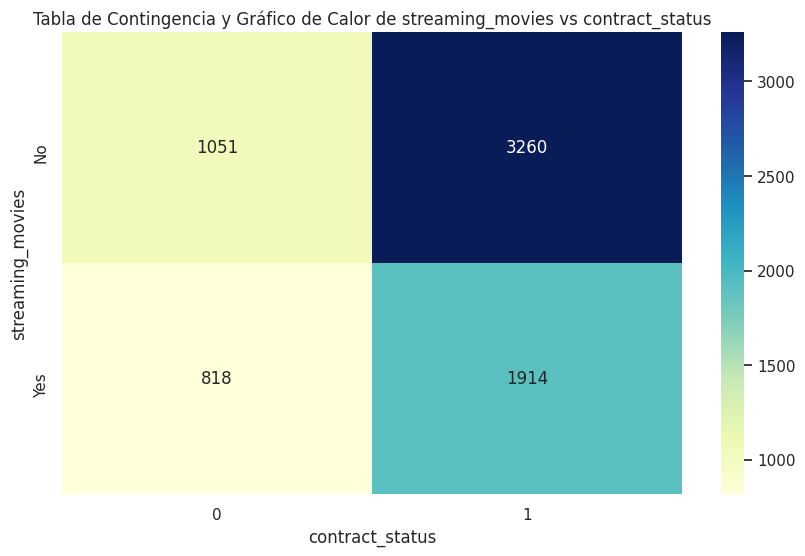

In [ ]:
# Dataset completo 'data'
columns_data = data.drop(columns=['customer_id', 'begin_date', 'end_date']).columns

# Visualizar histogramas de variables categóricas
visualize_histograms(data, columns_data, 'Histogramas de variables categóricas del dataset data')

# Visualizar gráficos de línea de variables numéricas
visualize_line_plots(data, columns_data, 'Gráfico de Línea de variables numéricas del dataset data')

# Visualizar gráficos de torta de variables de tipo int
visualize_pie_charts(data, columns_data, 'Gráficos de Torta de variables enteras del dataset data')

# Excluyendo las columnas 'MonthlyChanges' y 'ContractStatus' para la visualización del mapa de calor contra la variable objetivo.
heatmap_columns = [col for col in columns_data if col not in ['monthly_charges', 'contract_status']]
visualize_contingency_heatmap(data, heatmap_columns, 'contract_status', 'Tablas de Contingencia del dataset data')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Excelente trabajo con los gráficos en esta sección. Sin embargo, te recomiendo ser más específico al visualizar los datos, diferenciando claramente entre variables categóricas y numéricas. Recuerda que el histograma no es la mejor opción para visualizar variables categóricas; para estas, podrías usar gráficos de barras o diagramas de pastel, que proporcionan una representación más clara y precisa de la distribución de categorías.
</div>


**Respecto a la distribución de los datos en del dataset completo:**
* En la variable 'Type', 'Month-to-month' tiene mayor frecuencia que las demás, por lo que podría ocasionar distorsion en el modelo.
* Las variables PaperlessBilling y  PaymentMethod tienen una distribucion relativamente homogenea, excepto el pago por medio de cheque electrónico (electronic check), el cual tiene mayor preferencia.
* En el cargo mensual, se puede apreciar un pago mucho más frecuente entre los 0 a 20 dolares mensuales. Esto puede marcar diferencia en el modelo predictivo.
* Si vemos los cargos totales, la distribución pasa a ser homogenea en todos sus rangos.
* Podemos ver en la variable objetivo 'ContractStatus' que el valor 1 tiene mas frecuencia (5000) con respecto al valor 0 (poco menos de 2000 casos), es decir, la mayoría de contratos no han sido cancelados.
* En relacion al genero, no se ven una tendencia clara, lo cual puede ser irrelevante para el modelo y respecto a si son mayores de edad (SeniorCitizen) se puede ver que una minoría lo es..
* Respecto a si tienen pareja o no, este no hay una tendencia clara, pero respecto a si tiene dependientes en su familia sólo 2/7 lo tienen.
* Respecto al dataset 'internet' se ve que hubo más casos de usuarios que usaron megas más bajos.

**Respecto a la correlacion con la variable objetivo (categorica) sobre el término de contrato:**

* El término de contrato se da más en los contratos mensuales, no de largo plazo.
* Si hay facturacion electrónica hay mas casos de termino de contrato.
* El término se da más por el metodo de pago 'electronic check'.
* Se ve una leve tendencia al termino de contrato si no son 'senior citizen'.
* Los que no tienen dependientes ni pareja suelen terminar sus contratos.
* No se ve tendencia si el servicio tiene múltiples lineas.

**PREGUNTAS ACLARATORIAS**

1) El enunciado del proyecto dice que la información de los contratos cuenta a partir del '2020-02-01' pero analizando los datos solo 11 contratos inician en esa fecha. ¿Hay un error en el dataset 'contract' o el enunciado quiere decir otra cosa?

2) El dataset 'internet' no tiene el 'customerID' por lo que no puedo enlazar su información con los demas datasets.

3) ¿Será oportuno calcular la duración de los contratos (valor duracion en meses o dias) y el tiempo restante del contrato (fecha inicio hasta 'no')? De ser así, ¿como podria dejar esa columna de duracion de contrato, es decir, con valores numéricos y una categoria de 'vigente' en una columna? 

4) ¿Que quiere decir exactamente la variable 'session_date' del dataset 'internet'? ¿Debiese además haber una variable de tiempo para poder obtener el uso promedio de 'mb' por mes?

5) El enunciado del proyecto habla de que Interconnect proporciona otros tipos de servicios, como: Seguridad en Internet y un bloqueador de sitios web maliciosos, una línea de soporte técnico, almacenamiento de archivos en la nube y backup de datos, y finalmente, Streaming de TV y directorio de películas, pero estos servicios no aparecen en los dataset entregados. ¿efectivamente falta algun otro dataset?.

6) ¿Para el modelo debiese trabajar con el cobro mensual o cobro total? ¿Debería usar solo uno, no ambos, cierto?


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>

Has planteado preguntas importantes que necesitan clarificación para avanzar correctamente en el proyecto:

1) **Sobre la información de contratos a partir del '2020-02-01'**: Hay un error en el enunciado. 

2) **Falta de 'customerID' en el dataset 'internet'**: Es un problema significativo, ya que impide enlazar esta información con otros datasets. Te aconsejo revisar los datasets de la siguiente carpeta, pues creo son diferentes y eso es el problema: 
<code>
contract = pd.read_csv('/datasets/final_provider/contract.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
</code>    

3) **Cálculo de la duración de los contratos**: Sí, es muy oportuno calcular la duración de los contratos y el tiempo restante. Podrías crear una columna de duración en días o meses y otra columna para indicar si el contrato está vigente ('vigente') o terminado. Tal como lo has planteado. 

4) **Clarificación de 'session_date' en el dataset 'internet'**: Sí representa fechas de uso de servicio. 

5) **Servicios adicionales de Interconnect**: No hay data sets adicionales. Aconsejo que no revisemos servicios adicionales. 
    

6) **Cobro mensual vs cobro total**: Para el modelo predictivo, generalmente es mejor usar una sola variable para evitar multicolinealidad. Entre cobro mensual y cobro total, elegiría el cobro mensual, ya que refleja mejor la carga financiera recurrente del cliente y puede ser más dinámico para detectar cambios en el comportamiento del cliente.

</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
    Se tomaron sus comentarios y se hicieron las correcciones correspondientes.
</div>

</br>

**PASOS A SEGUIR PARA RESOLVER LA TAREA**

1) Una vez realizado el análisis exploratorio de datos, debiese pasar a la etapa de 'Preparación de datos' según las conclusiones obtenidas de ese análisis. Esto incluye: ajuste de nombres en minusculas, tipo de datos de fechas, unificar datasets(debe incluir la informacion faltante de los servicios extras ademas de telefonia e internet), conversión de variables categóricas en numéricas para realizar el modelo, normalizar las variables numéricas, examinar equilibrio de clases.

2) Dado que el objetivo es predecir una variable binaria (cancelación o no cancelación), se usarán modelos de clasificación supervisada, donde inicialmente se entrenará y evaluará el modelo de regresión lineal para tener un análisis base.

3) Luego, seleccionamos el modelo más optimo basado en las métricas de evaluación como precision, recall, f1-score y AUC-ROC e hiperparámetros a través de métodos iterativos. Modelos pueden ser: Árboles de Decisión y Random Forest, o modelos más complejos con alto rendimiento como Gradient Boosting Machines (GBM) y XGBoost.


## Examinación de equilibrio de clases

Antes de examinar las clases, debemos preparar el dataset con la mayor cantidad de valores numéricos, por ejemplo, transformaremos las variables con datos 'Yes' en 1 y 'No' en 0.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   contract_status    7043 non-null   int64         
 8   gender             7043 non-null   object        
 9   senior_citizen     7043 non-null   int64         
 10  partner            7043 non-null   object        
 11  dependents         7043 non-null   object        
 12  multiple_lines     7043 non-null   object        
 13  internet_service   7043 non-null   object        
 14  online_s

In [ ]:
# Función para transformar las variables con Yes y No en 1 y 0.
def transform_yes_no_to_binary(df, columns):
    for column in columns:
        df[column] = df[column].map({'Yes': 1, 'No': 0})
    return df


# Lista de columnas a transformar
columns_to_transform = ['paperless_billing', 'partner', 'dependents','multiple_lines','online_security','online_backup',
                        'device_protection','tech_support','streaming_tv','streaming_movies'] # columnas categoricas

#  Se llama a la función para transformar el dataset 'data'
data = transform_yes_no_to_binary(data, columns_to_transform)

# Verificamos la transformación
print(data[columns_to_transform].head())

   paperless_billing  partner  dependents  multiple_lines  online_security  \
0                  1        1           0               0                0   
1                  0        0           0               0                1   
2                  1        0           0               0                1   
3                  0        0           0               0                1   
4                  1        0           0               0                0   

   online_backup  device_protection  tech_support  streaming_tv  \
0              1                  0             0             0   
1              0                  1             0             0   
2              1                  0             0             0   
3              0                  1             1             0   
4              0                  0             0             0   

   streaming_movies  
0                 0  
1                 0  
2                 0  
3                 0  
4                 

In [ ]:
# Convertimos las variables categóricas del dataset en representaciones numéricas usando one-hot encoding
data_balanced = pd.get_dummies(data, columns=['type','payment_method','gender','internet_service'])

In [ ]:
data_balanced.head()

,customer_id,begin_date,end_date,paperless_billing,monthly_charges,contract_status,senior_citizen,partner,dependents,multiple_lines,...,type_Two year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Female,gender_Male,internet_service_DSL,internet_service_Fiber optic,internet_service_No
0,7590-VHVEG,2020-01-01,NaT,1,29.85,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,2017-04-01,NaT,0,56.95,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
2,3668-QPYBK,2019-10-01,2019-12-01,1,53.85,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,7795-CFOCW,2016-05-01,NaT,0,42.30,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,9237-HQITU,2019-09-01,2019-11-01,1,70.70,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


In [ ]:
# Recordamos el equilibrio de clases de la variable objetivo.
clases_equilibradas = data_balanced['contract_status'].value_counts(normalize=True)
clases_equilibradas

1    0.73463
0    0.26537
Name: contract_status, dtype: float64

Esto significa que aproximadamente el 73.46% de las observaciones en el conjunto de datos pertenecen a la clase 1 (contratos vigentes), mientras que aproximadamente el 26.54% pertenecen a la clase 0 (contratos dados de baja).

En este caso, hay un desequilibrio significativo, ya que la clase 1 es mucho más común que la clase 0 (contratos dados de baja). Tendremos en cuenta este desequilibrio al entrenar y evaluar los modelos, ya que puede afectar la capacidad del modelo para aprender correctamente patrones en la clase minoritaria y puede sesgar las predicciones hacia la clase mayoritaria.

In [ ]:
# Eliminamos las columnas que no usaremos en el modelo por concepto de MULTICOLINEALIDAD.
data_balanced_modelo = data_balanced.drop(columns=['customer_id', 'begin_date', 'end_date'])

## Preparación del modelo

### Modelo Equilibrado (submuestreo de clase mayoritaria)

#### División de los conjuntos

In [ ]:
# Separación de características y target
x = data_balanced_modelo.drop('contract_status', axis=1)
y = data_balanced_modelo['contract_status']

# Dividimos el conjunto de datos en entrenamiento + validación y prueba
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Dividimos el conjunto de entrenamiento + validación en conjunto de entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Revisamos la distribución de las clases
print("Distribución en el conjunto de entrenamiento:", y_train.value_counts())
print("Distribución en el conjunto de validación:", y_val.value_counts())
print("Distribución en el conjunto de prueba:", y_test.value_counts())

Distribución en el conjunto de entrenamiento: 1    3104
0    1121
Name: contract_status, dtype: int64
Distribución en el conjunto de validación: 1    1035
0     374
Name: contract_status, dtype: int64
Distribución en el conjunto de prueba: 1    1035
0     374
Name: contract_status, dtype: int64


#### Equilibrio por submuestreo de clase mayoritaria

In [ ]:
# Combinamos x_train e y_train en un solo DataFrame para facilitar el muestreo
train_data = pd.concat([x_train, y_train], axis=1)

# Separamos la clase mayoritaria y la minoritaria
df_majority = train_data[train_data.contract_status == 1]
df_minority = train_data[train_data.contract_status == 0]

# Submuestreo de la clase mayoritaria
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # muestra sin reemplazo
                                   n_samples=len(df_minority), # para igualar el número de la clase minoritaria
                                   random_state=42)  # para la reproducibilidad

# Combinamos clases minoritaria y mayoritaria
train_data_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separamos de nuevo características y target
x_train_balanced = train_data_balanced.drop('contract_status', axis=1)
y_train_balanced = train_data_balanced['contract_status']

# Revisamos la distribución de las clases en el conjunto de entrenamiento equilibrado
print("Distribución en el conjunto de entrenamiento equilibrado:", y_train_balanced.value_counts())

Distribución en el conjunto de entrenamiento equilibrado: 0    1121
1    1121
Name: contract_status, dtype: int64


#### Iteración de modelos

In [ ]:
# Definimos modelos candidatos
models = {
    'RandomForest': RandomForestClassifier(random_state=12345),
    'DecisionTree': DecisionTreeClassifier(random_state=12345),
    'LogisticRegression': LogisticRegression(random_state=12345),
    'LightGBM': LGBMClassifier(random_state=12345),
    'CatBoost': CatBoostClassifier(random_state=12345, verbose=0),
    'XGBoost': XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss'),
    'GradientBoosting': LGBMClassifier(boosting_type='gbdt', random_state=12345)  # Agregamos Gradient Boosting
}


# Definimos hiperparámetros con rangos para iteración según aplique a cada modelo.
param_grid = {
    'RandomForest': {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 21)},
    'DecisionTree': {'max_depth': range(1, 21)},
    'LogisticRegression': {},  # No hay hiperparámetros para LogisticRegression
    'LightGBM': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'CatBoost': {'depth': range(1, 11), 'iterations': range(50, 201, 50)},
    'XGBoost': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'GradientBoosting': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)}  # Hiperparámetros para Gradient Boosting
}

# Definimos parámetros para iteración de entrenamiento y ajuste de modelos
best_model_1 = None
best_f1_score_1 = 0

for name, model in models.items():
    params = param_grid[name]
    best_params = None
    best_model_instance = None
    best_f1_score_instance = 0
    
    for n_estimators in params.get('n_estimators', [None]):
        for max_depth in params.get('max_depth', [None]):
            if name == 'RandomForest':
                model_instance = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'DecisionTree':
                model_instance = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
            elif name == 'LightGBM':
                model_instance = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'CatBoost':
                model_instance = CatBoostClassifier(depth=max_depth, iterations=n_estimators, random_state=12345, verbose=0)
            elif name == 'XGBoost':
                model_instance = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345, use_label_encoder=False, eval_metric='logloss')
            elif name == 'GradientBoosting':  # Implementación del Gradient Boosting
                model_instance = LGBMClassifier(boosting_type='gbdt', n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            else:
                model_instance = LogisticRegression(random_state=12345)
            
            # Entrenamos con los datos balanceados
            model_instance.fit(x_train_balanced, y_train_balanced)
            
            # Evaluamos en el conjunto de validación
            y_val_pred = model_instance.predict(x_val)
            f1 = f1_score(y_val, y_val_pred)
            
            if f1 > best_f1_score_instance:
                best_f1_score_instance = f1
                best_model_instance = model_instance
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
    
    print(f"Mejor F1-score para {name}: {best_f1_score_instance} con hiperparámetros: {best_params}")
    
    if best_f1_score_instance > best_f1_score_1:
        best_model_1 = best_model_instance
        best_f1_score_1 = best_f1_score_instance

# Evaluación del mejor modelo en el conjunto de prueba
y_test_pred = best_model_1.predict(x_test)
test_f1_1 = f1_score(y_test, y_test_pred)
print(f"Mejor modelo en conjunto de prueba: {best_model_1} con F1-score = {test_f1_1}")

Mejor F1-score para RandomForest: 0.7997835497835498 con hiperparámetros: {'n_estimators': 80, 'max_depth': 3}
Mejor F1-score para DecisionTree: 0.810498687664042 con hiperparámetros: {'n_estimators': None, 'max_depth': 3}


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejor F1-score para LogisticRegression: 0.8006500541711808 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para LightGBM: 0.79672131147541 con hiperparámetros: {'n_estimators': 200, 'max_depth': 1}
Mejor F1-score para CatBoost: 0.7824675324675325 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para XGBoost: 0.7991290146978769 con hiperparámetros: {'n_estimators': 100, 'max_depth': 1}
Mejor F1-score para GradientBoosting: 0.79672131147541 con hiperparámetros: {'n_estimators': 200, 'max_depth': 1}
Mejor modelo en conjunto de prueba: DecisionTreeClassifier(max_depth=3, random_state=12345) con F1-score = 0.8102456874019864


In [ ]:
# Evaluamos el mejor modelo en conjunto de prueba
y_pred_test = best_model_1.predict(x_test)
# Evaluamos F1 en el conjunto de prueba
f1_test_1 = f1_score(y_test, y_pred_test)
print("Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:")
print(classification_report(y_test, y_pred_test))
print(f'F1 en conjunto de prueba: {f1_test_1}')

Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.51      0.72      0.60       374
           1       0.88      0.75      0.81      1035

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.78      0.74      0.75      1409

F1 en conjunto de prueba: 0.8102456874019864


### Modelo Equilibrado (sobremuestreo clase minoritaria)

#### División de los conjuntos

In [ ]:
# Separación de características y target
a = data_balanced_modelo.drop('contract_status', axis=1)
b = data_balanced_modelo['contract_status']

# Dividimos el conjunto de datos en entrenamiento + validación y prueba
a_train_val, a_test, b_train_val, b_test = train_test_split(a, b, test_size=0.2, random_state=42, stratify=b)

# Dividimos el conjunto de entrenamiento + validación en conjunto de entrenamiento y validación
a_train, a_val, b_train, b_val = train_test_split(a_train_val, b_train_val, test_size=0.25, random_state=42, stratify=b_train_val)

# Revisamos la distribución de las clases
print("Distribución en el conjunto de entrenamiento:", b_train.value_counts())
print("Distribución en el conjunto de validación:", b_val.value_counts())
print("Distribución en el conjunto de prueba:", b_test.value_counts())

Distribución en el conjunto de entrenamiento: 1    3104
0    1121
Name: contract_status, dtype: int64
Distribución en el conjunto de validación: 1    1035
0     374
Name: contract_status, dtype: int64
Distribución en el conjunto de prueba: 1    1035
0     374
Name: contract_status, dtype: int64


#### Equilibrio por sobremuestreo de clase minoritaria

In [ ]:
# Combinamos a_train e b_train en un solo DataFrame para facilitar el muestreo
train_data = pd.concat([a_train, b_train], axis=1)

# Separamos la clase mayoritaria y la minoritaria
df_majority = train_data[train_data.contract_status == 1]
df_minority = train_data[train_data.contract_status == 0]


# Sobremuestreo de la clase minoritaria
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # muestra con reemplazo
                                 n_samples=len(df_majority), # para igualar el número de la clase mayoritaria
                                 random_state=42)  # para la reproducibilidad


# Combinamos clases minoritaria y mayoritaria
train_data_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separamos de nuevo características y target
a_train_balanced = train_data_balanced.drop('contract_status', axis=1)
b_train_balanced = train_data_balanced['contract_status']

# Revisamos la distribución de las clases en el conjunto de entrenamiento equilibrado
print("Distribución en el conjunto de entrenamiento equilibrado:", b_train_balanced.value_counts())

Distribución en el conjunto de entrenamiento equilibrado: 0    1121
1    1121
Name: contract_status, dtype: int64


#### Iteración de modelos

In [ ]:
# Definimos modelos candidatos
models = {
    'RandomForest': RandomForestClassifier(random_state=12345),
    'DecisionTree': DecisionTreeClassifier(random_state=12345),
    'LogisticRegression': LogisticRegression(random_state=12345),
    'LightGBM': LGBMClassifier(random_state=12345),
    'CatBoost': CatBoostClassifier(random_state=12345, verbose=0),
    'XGBoost': XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss'),
    'GradientBoosting': LGBMClassifier(boosting_type='gbdt', random_state=12345)  # Agregamos Gradient Boosting
}


# Definimos hiperparámetros con rangos para iteración según aplique a cada modelo.
param_grid = {
    'RandomForest': {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 21)},
    'DecisionTree': {'max_depth': range(1, 21)},
    'LogisticRegression': {},  # No hay hiperparámetros para LogisticRegression
    'LightGBM': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'CatBoost': {'depth': range(1, 11), 'iterations': range(50, 201, 50)},
    'XGBoost': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'GradientBoosting': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)}  # Hiperparámetros para Gradient Boosting
}

# Definimos parámetros para iteración de entrenamiento y ajuste de modelos
best_model_2 = None
best_f1_score_2 = 0

for name, model in models.items():
    params = param_grid[name]
    best_params = None
    best_model_instance = None
    best_f1_score_instance = 0
    
    for n_estimators in params.get('n_estimators', [None]):
        for max_depth in params.get('max_depth', [None]):
            if name == 'RandomForest':
                model_instance = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'DecisionTree':
                model_instance = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
            elif name == 'LightGBM':
                model_instance = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'CatBoost':
                model_instance = CatBoostClassifier(depth=max_depth, iterations=n_estimators, random_state=12345, verbose=0)
            elif name == 'XGBoost':
                model_instance = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345, use_label_encoder=False, eval_metric='logloss')
            elif name == 'GradientBoosting':  # Implementación del Gradient Boosting
                model_instance = LGBMClassifier(boosting_type='gbdt', n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            else:
                model_instance = LogisticRegression(random_state=12345)
            
            # Entrenamos con los datos balanceados
            model_instance.fit(a_train_balanced, b_train_balanced)
            
            # Evaluamos en el conjunto de validación
            b_val_pred = model_instance.predict(a_val)
            f1 = f1_score(b_val, b_val_pred)
            
            if f1 > best_f1_score_instance:
                best_f1_score_instance = f1
                best_model_instance = model_instance
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
    
    print(f"Mejor F1-score para {name}: {best_f1_score_instance} con hiperparámetros: {best_params}")
    
    if best_f1_score_instance > best_f1_score_2:
        best_model_2 = best_model_instance
        best_f1_score_2 = best_f1_score_instance

# Evaluación del mejor modelo en el conjunto de prueba
b_test_pred = best_model_2.predict(a_test)
test_f1_2 = f1_score(b_test, b_test_pred)
print(f"Mejor modelo en conjunto de prueba: {best_model_2} con F1-score = {test_f1_2}")

Mejor F1-score para RandomForest: 0.7997835497835498 con hiperparámetros: {'n_estimators': 80, 'max_depth': 3}
Mejor F1-score para DecisionTree: 0.810498687664042 con hiperparámetros: {'n_estimators': None, 'max_depth': 3}


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejor F1-score para LogisticRegression: 0.8006500541711808 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para LightGBM: 0.79672131147541 con hiperparámetros: {'n_estimators': 200, 'max_depth': 1}
Mejor F1-score para CatBoost: 0.7824675324675325 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para XGBoost: 0.7991290146978769 con hiperparámetros: {'n_estimators': 100, 'max_depth': 1}
Mejor F1-score para GradientBoosting: 0.79672131147541 con hiperparámetros: {'n_estimators': 200, 'max_depth': 1}
Mejor modelo en conjunto de prueba: DecisionTreeClassifier(max_depth=3, random_state=12345) con F1-score = 0.8102456874019864


In [ ]:
# Evaluamos el mejor modelo en conjunto de prueba
b_pred_test = best_model_2.predict(a_test)
# Evaluamos F1 en el conjunto de prueba
f1_test_2 = f1_score(b_test, b_pred_test)
print("Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:")
print(classification_report(b_test, b_pred_test))
print(f'F1 en conjunto de prueba: {f1_test_2}')

Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.51      0.72      0.60       374
           1       0.88      0.75      0.81      1035

    accuracy                           0.74      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.78      0.74      0.75      1409

F1 en conjunto de prueba: 0.8102456874019864


### Modelo Equilibrado (Ajuste de pesos de clase)

#### División de los conjuntos

In [ ]:
# Separamos las características y target
c = data_balanced_modelo.drop('contract_status', axis=1)
d = data_balanced_modelo['contract_status']

# Dividimos el conjunto de datos en entrenamiento + validación y prueba
c_train_val, c_test, d_train_val, d_test = train_test_split(c, d, test_size=0.2, random_state=42, stratify=d)

# Dividimos el conjunto de entrenamiento + validación en conjunto de entrenamiento y validación
c_train, c_val, d_train, d_val = train_test_split(c_train_val, d_train_val, test_size=0.25, random_state=42, stratify=d_train_val)

# Verificamos la distribución de las clases
print("Distribución en el conjunto de entrenamiento:", d_train.value_counts())
print("Distribución en el conjunto de validación:", d_val.value_counts())
print("Distribución en el conjunto de prueba:", d_test.value_counts())

Distribución en el conjunto de entrenamiento: 1    3104
0    1121
Name: contract_status, dtype: int64
Distribución en el conjunto de validación: 1    1035
0     374
Name: contract_status, dtype: int64
Distribución en el conjunto de prueba: 1    1035
0     374
Name: contract_status, dtype: int64


#### Iteracion de modelos (equilibrio de pesos)

In [ ]:
# Definimos modelos candidatos
models = {
    'RandomForest': RandomForestClassifier(random_state=12345, class_weight='balanced'),
    'DecisionTree': DecisionTreeClassifier(random_state=12345, class_weight='balanced'),
    'LogisticRegression': LogisticRegression(random_state=12345, class_weight='balanced'),
    'LightGBM': LGBMClassifier(random_state=12345, class_weight='balanced'),
    'CatBoost': CatBoostClassifier(random_state=12345, verbose=0, class_weights=[1, sum(d_train) / len(d_train)]),
    'XGBoost': XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(d_train) - sum(d_train)) / sum(d_train)),
    'GradientBoosting': LGBMClassifier(boosting_type='gbdt', random_state=12345, class_weight='balanced')
}

# Definimos hiperparámetros con rangos para iteración según aplique a cada modelo.
param_grid = {
    'RandomForest': {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 21)},
    'DecisionTree': {'max_depth': range(1, 21)},
    'LogisticRegression': {},  # No hay hiperparámetros para LogisticRegression
    'LightGBM': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'CatBoost': {'depth': range(1, 11), 'iterations': range(50, 201, 50)},
    'XGBoost': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'GradientBoosting': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)}  # Hiperparámetros para Gradient Boosting
}


# Definimos parámetros para iteración de entrenamiento y ajuste de modelos
best_model_3 = None
best_f1_score_3 = 0

for name, model in models.items():
    params = param_grid[name]
    best_params = None
    best_model_instance = None
    best_f1_score_instance = 0
    
    for n_estimators in params.get('n_estimators', [None]):
        for max_depth in params.get('max_depth', [None]):
            if name == 'RandomForest':
                model_instance = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345, class_weight='balanced')
            elif name == 'DecisionTree':
                model_instance = DecisionTreeClassifier(max_depth=max_depth, random_state=12345, class_weight='balanced')
            elif name == 'LightGBM':
                model_instance = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345, class_weight='balanced')
            elif name == 'CatBoost':
                model_instance = CatBoostClassifier(depth=max_depth, iterations=n_estimators, random_state=12345, verbose=0, class_weights=[1, sum(d_train) / len(d_train)])
            elif name == 'XGBoost':
                model_instance = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345, use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(len(d_train) - sum(d_train)) / sum(d_train))
            else:
                model_instance = LogisticRegression(random_state=12345, class_weight='balanced')
            
            # Entrenamos con los datos balanceados
            model_instance.fit(c_train, d_train)
            
            # Evaluamos en el conjunto de validación
            d_val_pred = model_instance.predict(c_val)
            f1 = f1_score(d_val, d_val_pred)
            
            if f1 > best_f1_score_instance:
                best_f1_score_instance = f1
                best_model_instance = model_instance
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
    
    print(f"Mejor F1-score para {name}: {best_f1_score_instance} con hiperparámetros: {best_params}")
    
    if best_f1_score_instance > best_f1_score_3:
        best_model_3 = best_model_instance
        best_f1_score_3 = best_f1_score_instance

# Evaluación del mejor modelo en el conjunto de prueba
d_test_pred = best_model_3.predict(c_test)
test_f1_3 = f1_score(d_test, d_test_pred)
print(f"Mejor modelo en conjunto de prueba: {best_model_3} con F1-score = {test_f1_3}")

Mejor F1-score para RandomForest: 0.8417572035899858 con hiperparámetros: {'n_estimators': 30, 'max_depth': 18}
Mejor F1-score para DecisionTree: 0.815734989648033 con hiperparámetros: {'n_estimators': None, 'max_depth': 4}
Mejor F1-score para LogisticRegression: 0.7962962962962963 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para LightGBM: 0.8168724279835391 con hiperparámetros: {'n_estimators': 200, 'max_depth': 20}
Mejor F1-score para CatBoost: 0.8393378773125608 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para XGBoost: 0.8220918866080157 con hiperparámetros: {'n_estimators': 200, 'max_depth': 12}
Mejor F1-score para GradientBoosting: 0.7962962962962963 con hiperparámetros: {'n_estimators': 50, 'max_depth': 1}
Mejor modelo en conjunto de prueba: RandomForestClassifier(class_weight='balanced', max_depth=18, n_estimators=30,
                       random_state=12345) con F1-score = 0.835383159886471


In [ ]:
# Evaluamos el mejor modelo en conjunto de prueba
d_pred_test = best_model_3.predict(c_test)
# Evaluamos F1 en el conjunto de prueba
f1_test_3 = f1_score(d_test, d_pred_test)
print("Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:")
print(classification_report(d_test, d_pred_test))
print(f'F1 en conjunto de prueba: {f1_test_3}')

Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.54      0.48      0.51       374
           1       0.82      0.85      0.84      1035

    accuracy                           0.75      1409
   macro avg       0.68      0.66      0.67      1409
weighted avg       0.74      0.75      0.75      1409

F1 en conjunto de prueba: 0.835383159886471


### Modelo equilibrado (método Shuffle)

#### Funcion equilibrio por metodo shuffle

In [ ]:
# Definimos la función de sobremuestreo
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=54321
    )
    return features_upsampled, target_upsampled

#### División de conjuntos aplicando función shuffle

In [ ]:
# Separamos la características y target
h = data_balanced_modelo.drop('contract_status', axis=1)
i = data_balanced_modelo['contract_status']

# Dividimos el conjunto de datos en entrenamiento + validación y prueba
h_train_val, h_test, i_train_val, i_test = train_test_split(h, i, test_size=0.2, random_state=42, stratify=i)

# Dividimos el conjunto de entrenamiento + validación en conjunto de entrenamiento y validación
h_train, h_val, i_train, i_val = train_test_split(h_train_val, i_train_val, test_size=0.25, random_state=42, stratify=i_train_val)

# Aplicamos la función de sobremuestreo al conjunto de entrenamiento
h_train_balanced, i_train_balanced = upsample(h_train, i_train, repeat=1)

# Verificamos la distribución de las clases
print("Distribución en el conjunto de entrenamiento equilibrado:", i_train_balanced.value_counts())
print("Distribución en el conjunto de validación:", i_val.value_counts())
print("Distribución en el conjunto de prueba:", i_test.value_counts())

Distribución en el conjunto de entrenamiento equilibrado: 1    3104
0    1121
Name: contract_status, dtype: int64
Distribución en el conjunto de validación: 1    1035
0     374
Name: contract_status, dtype: int64
Distribución en el conjunto de prueba: 1    1035
0     374
Name: contract_status, dtype: int64


#### Iteracion de modelos

In [ ]:
# Definimos modelos candidatos
models = {
    'RandomForest': RandomForestClassifier(random_state=12345),
    'DecisionTree': DecisionTreeClassifier(random_state=12345),
    'LogisticRegression': LogisticRegression(random_state=12345),
    'LightGBM': LGBMClassifier(random_state=12345),
    'CatBoost': CatBoostClassifier(random_state=12345, verbose=0),
    'XGBoost': XGBClassifier(random_state=12345, use_label_encoder=False, eval_metric='logloss'),
    'GradientBoosting': LGBMClassifier(boosting_type='gbdt', random_state=12345)  # Agregamos Gradient Boosting
}

# Definimos hiperparámetros con rangos para iteración según aplique a cada modelo.
param_grid = {
    'RandomForest': {'n_estimators': range(10, 101, 10), 'max_depth': range(1, 21)},
    'DecisionTree': {'max_depth': range(1, 21)},
    'LogisticRegression': {},  # No hay hiperparámetros para LogisticRegression
    'LightGBM': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'CatBoost': {'depth': range(1, 11), 'iterations': range(50, 201, 50)},
    'XGBoost': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)},
    'GradientBoosting': {'n_estimators': range(50, 201, 50), 'max_depth': range(1, 21)}  # Hiperparámetros para Gradient Boosting
}

# Definimos parámetros para iteración de entrenamiento y ajuste de modelos
best_model_4 = None
best_f1_score_4 = 0

for name, model in models.items():
    params = param_grid[name]
    best_params = None
    best_model_instance = None
    best_f1_score_instance = 0
    
    for n_estimators in params.get('n_estimators', [None]):
        for max_depth in params.get('max_depth', [None]):
            if name == 'RandomForest':
                model_instance = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'DecisionTree':
                model_instance = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
            elif name == 'LightGBM':
                model_instance = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            elif name == 'CatBoost':
                model_instance = CatBoostClassifier(depth=max_depth, iterations=n_estimators, random_state=12345, verbose=0)
            elif name == 'XGBoost':
                model_instance = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=12345, use_label_encoder=False, eval_metric='logloss')
            elif name == 'GradientBoosting':  # Implementación del Gradient Boosting
                model_instance = LGBMClassifier(boosting_type='gbdt', n_estimators=n_estimators, max_depth=max_depth, random_state=12345)
            else:
                model_instance = LogisticRegression(random_state=12345)
            
            # Entrenamos con los datos balanceados
            model_instance.fit(h_train_balanced, i_train_balanced)
            
            # Evaluamos en el conjunto de validación
            i_val_pred = model_instance.predict(h_val)
            f1 = f1_score(i_val, i_val_pred)
            
            if f1 > best_f1_score_instance:
                best_f1_score_instance = f1
                best_model_instance = model_instance
                best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}
    
    print(f"Mejor F1-score para {name}: {best_f1_score_instance} con hiperparámetros: {best_params}")
    
    if best_f1_score_instance > best_f1_score_4:
        best_model_4 = best_model_instance
        best_f1_score_4 = best_f1_score_instance

# Evaluación del mejor modelo en el conjunto de prueba
i_test_pred = best_model_4.predict(h_test)
test_f1_4 = f1_score(i_test, i_test_pred)
print(f"Mejor modelo en conjunto de prueba: {best_model_4} con F1-score = {test_f1_4}")


Mejor F1-score para RandomForest: 0.8634280476626948 con hiperparámetros: {'n_estimators': 20, 'max_depth': 6}
Mejor F1-score para DecisionTree: 0.8564814814814814 con hiperparámetros: {'n_estimators': None, 'max_depth': 4}


/opt/conda/envs/python3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejor F1-score para LogisticRegression: 0.8623767026773133 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para LightGBM: 0.8630009319664492 con hiperparámetros: {'n_estimators': 150, 'max_depth': 1}
Mejor F1-score para CatBoost: 0.8474894415767246 con hiperparámetros: {'n_estimators': None, 'max_depth': None}
Mejor F1-score para XGBoost: 0.8622139187295655 con hiperparámetros: {'n_estimators': 50, 'max_depth': 1}
Mejor F1-score para GradientBoosting: 0.8630009319664492 con hiperparámetros: {'n_estimators': 150, 'max_depth': 1}
Mejor modelo en conjunto de prueba: RandomForestClassifier(max_depth=6, n_estimators=20, random_state=12345) con F1-score = 0.8559708295350958


In [ ]:
# Evaluamos el mejor modelo en conjunto de prueba
i_pred_test = best_model_4.predict(h_test)
# Evaluamos F1 en el conjunto de prueba
f1_test_4 = f1_score(i_test, i_pred_test)
print("Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:")
print(classification_report(i_test, i_pred_test))
print(f'F1 en conjunto de prueba: {f1_test_4}')

Mejor modelo (basado en F1-score en conjunto de validación) en conjunto de prueba:
              precision    recall  f1-score   support

           0       0.62      0.41      0.49       374
           1       0.81      0.91      0.86      1035

    accuracy                           0.78      1409
   macro avg       0.71      0.66      0.67      1409
weighted avg       0.76      0.78      0.76      1409

F1 en conjunto de prueba: 0.8559708295350958


## Métrica AUC-ROC

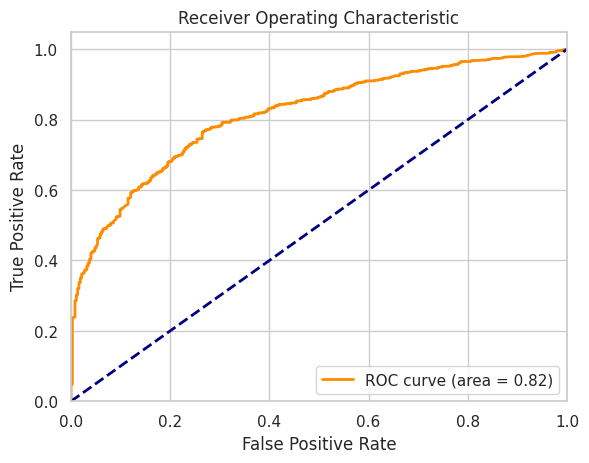

Valor AUC-ROC: 0.8152367666434162


In [ ]:
# Calculamos y graficamos AUC-ROC usando el mejor modelo que es "best_model_4"
i_test_prob = best_model_4.predict_proba(h_test)[:, 1]
roc_auc = roc_auc_score(i_test, i_test_prob)
fpr, tpr, thresholds = roc_curve(i_test, i_test_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Imprimimos el valor AUC-ROC
print("Valor AUC-ROC:", roc_auc)

## Conclusiones

De informe podemos concluir lo siguiente:

Luego de realizar 4 tipos de equilibrio de clases e iterar distintos modelos predictivos para predecir la cancelación de contratos en Telecom, podemos concluir que el mejor modelo fue:
    
a) **Efectividad general del modelo**
    
    *  RandomForestClassifier con un max_depth=6, n_estimators=20.
    *  Este modelo se obtuvo mediante el método de sobremuestreo de clases por aplicación "shuffle".
    *  Valor AUC-ROC fue de 0.81, lo que sugiere que el modelo tiene una buena capacidad de discriminación entre los contratos que serán dados de baja y los que no.
    *  El modelo tiene una exactitud del 78%, lo que significa que el modelo clasifica correctamente la mayoría de los contratos.
    *  Valor F1 para la clase 1 (contratos vigentes) fue de 0.86 y valor F1 para clase 0 (contratos dados de baja) fue de 0.49.
    
b) **Desempeño en la Clase Minoritaria (Contratos que serán dados de baja - Clase 0)**
    
    * Precisión del 62%: De todos los contratos que el modelo predijo que serían dados de baja, el 62% fueron efectivamente dados de baja, es decir, alto numero de falsos positivos.
    * Recuperación del 41%: El modelo identifica el 41% de todos los contratos que efectivamente serán dados de baja. Aunque este valor no es muy alto, indica que casi la mitad de los contratos en riesgo son detectados.
    * F1-score del 49%: Este es un balance entre la precisión y la recuperación, lo que muestra que hay un margen para mejorar la detección efectiva de los contratos en riesgo.


c) **Desempeño en la Clase Mayoritaria (Contratos que no serán dados de baja - Clase 1)**
    
    * Precisión del 81% y Recuperación del 91%: Estos valores indican que el modelo es muy efectivo en identificar correctamente los contratos que no serán dados de baja, es decir, con pocos falsos negativos.
    
    
* Finalmente, el modelo predictivo muestra un buen desempeño general y es especialmente preciso para identificar contratos que no serán dados de baja, aunque la identificación de contratos en riesgo de baja aún tiene un margen de mejora, el modelo proporciona un punto de partida importante para acciones preventivas y la retención de clientes.
 

## INFORME DE SOLUCION

- ¿Qué pasos del plan se realizaron y qué pasos se omitieron (explica por qué)?
- ¿Qué dificultades encontraste y cómo lograste resolverlas?
- ¿Cuáles fueron algunos de los pasos clave para resolver la tarea?
- ¿Cuál es tu modelo final y qué nivel de calidad tiene?

Para resolver este proyecto de Interconnect se realizaron los siguientes pasos:

1) Carga y análisis exploratorio de datos (EDA), en donde el primer paso fué el análisis de cada uno de los datasets, esto incluye: duplicidad de datos, valores ausentes, anomalías en los datos, tipo de datos.
2) Luego, se procedió a la etapa del preprocesamiento de datos, en donde se realizó: la creación de la columna objetivo 'contract_status', la integración de todos los datasets en uno único para efectos de realizar el modelado, luego se procedió a la corrección de titulos de datasets en minúscula, llenado de valores ausentes provocado por la integración de los datasets, cambio de tipo de datos y evaluación de multicolinealidad.
3) Para finalizar el EDA, se procedió a realizar graficos acordes a los tipos de datos categóricos / numéricos del dataset y se comparó contra la variable objetivo.

Nota: En estos pasos se omitió considerar el tiempo de inicio y final del contrato, es decir, no se consideró usar una columna nueva de vigencia de contrato ya que implica multicolinealidad con respecto a la variable objetivo (columna creada para ver si un contrato estaba vigente o no). Además se omitió la variable de customer_id en el dataset final. Se omitió la eliminación de duplicidad de datos, ya que no habían.

4) Después del EDA, se procedió a examinar el equilibrio de clases y a aplicar la transformación de datos categóricos a numéricos para preparar el dataset al modelado.
5) Para hacer el modelado más completo se realizaron 4 tipos de equilibrio de clases (submuestreo, sobremuestreo de clases, ajuste de pesos y sobremuestreo por método shuffle) y en cada uno se iteraron los modelos: 'RandomForest','DecisionTree','LogisticRegression','LightGBM','CatBoost','XGBoost' y     'GradientBoosting', con distintos numero de estimadores y profundidad.
6) Finalmente, luego de encontrar el mejor modelo en función de exactitud y valor F1, se procedió a calcular le métrica AUC-ROC. 

    * Los resultados finales fueron: mejor modelo RandomForestClassifier con un max_depth=6, n_estimators=20 bajo el equilibrio con sobremuestreo (shuffle). Valor F1 para la clase 1 (contratos vigentes) fue de 0.86 y valor F1 para clase 0 (contratos dados de baja) fue de 0.49. Valor UAC-ROC de 0.81

**Dificultades dentro del proyecto**

A lo largo del proyecto tuve algunas complicaciones con la resolución de este, entre ellas se encuentran las siguientes:

* Con la lectura de los datasets, dado que nunca antes había leido desde una carpeta zip, lo que me llevó a mal interpretar uno de los datasets. Esto lo solucioné gracias a los comentarios del revisor.
* Agregar más detalle en los gráficos para hacerlos más visibles. Tuve que buscar nuevas herramientas dentro de la función plot para hacer más grafico lo que quería mostrar.
* Analisis de multicolinealidad, si bien las variables que eliminé/omití para el desarrollo del modelo lo hice en función del concepto de multicolinealidad, me quedó la duda si otro camino hubiera sido aún más eficiente.
* Tuve algo de dificultad al agregar más complejidad en la iteracion de los modelos, ya que agregué más de los que tenía planeado, además de agregar 4 tipos de equilibrio de clases. Para esto use de referencia 2 proyectos que había realiazado anteriormente en este bootcamp para integrarlos y hacer una iteración de modelos más completa.